#📌 Extracción

In [16]:
import pandas as pd

df = pd.read_json('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [17]:
data = pd.json_normalize(df.to_dict(orient='records'))
data.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [19]:

# Renombramos columnas para hacer un mejor analisis
data = data.rename(columns={
    'customer.gender': 'gender',
    'customer.SeniorCitizen': 'SeniorCitizen',
    'customer.Partner': 'Partner',
    'customer.Dependents': 'Dependents',
    'customer.tenure': 'tenure',
    'phone.PhoneService': 'PhoneService',
    'phone.MultipleLines': 'MultipleLines',
    'internet.InternetService': 'InternetService',
    'internet.OnlineSecurity': 'OnlineSecurity',
    'internet.OnlineBackup': 'OnlineBackup',
    'internet.DeviceProtection': 'DeviceProtection',
    'internet.TechSupport': 'TechSupport',
    'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingMovies',
    'customer.Contract': 'Contract',
    'customer.PaperlessBilling': 'PaperlessBilling',
    'customer.PaymentMethod': 'PaymentMethod',
    'account.CustomerStatus': 'CustomerStatus',
    'account.Contract': 'Contract',
    'account.PaperlessBilling': 'PaperlessBilling',
    'account.PaymentMethod': 'PaymentMethod',
    'account.Charges.Monthly': 'Charges_Monthly',
    'account.Charges.Total': 'Charges_Total'

})
data.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#📊 Carga y análisis

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [21]:
data.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [22]:
data.duplicated(subset='customerID').sum()

np.int64(0)

In [23]:
data.dtypes


,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [24]:
# Verifica valores raros
print(data['Charges_Total'].unique())

['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [25]:

data['Cuentas_Diarias'] = data['Charges_Monthly'] / 30
data.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


In [26]:
data.describe()


,SeniorCitizen,tenure,Charges_Monthly,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2.157337
std,0.369074,24.571773,30.129572,1.004319
min,0.000000,0.000000,18.250000,0.608333
25%,0.000000,9.000000,35.425000,1.180833
50%,0.000000,29.000000,70.300000,2.343333
75%,0.000000,55.000000,89.875000,2.995833
max,1.000000,72.000000,118.750000,3.958333


In [27]:
#Hacemos a chargesTotal numerico no objeto
data['Charges_Total'] = pd.to_numeric(data['Charges_Total'], errors='coerce')
data.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [28]:

categorical_cols = data.select_dtypes(include=['object', 'bool']).columns
categorical_cols

Index(['customerID', 'Churn', 'gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [29]:
print("\nFrecuencia de Categorías en Columnas Categóricas:")
for col in categorical_cols:
    print(f"\nColumna: {col}")
    print(data[col].value_counts())


Frecuencia de Categorías en Columnas Categóricas:

Columna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

Columna: Churn
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Columna: gender
gender
Male      3675
Female    3592
Name: count, dtype: int64

Columna: Partner
Partner
No     3749
Yes    3518
Name: count, dtype: int64

Columna: Dependents
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Columna: PhoneService
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Columna: MultipleLines
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

Columna: InternetService
InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

Columna: OnlineSecurity
O

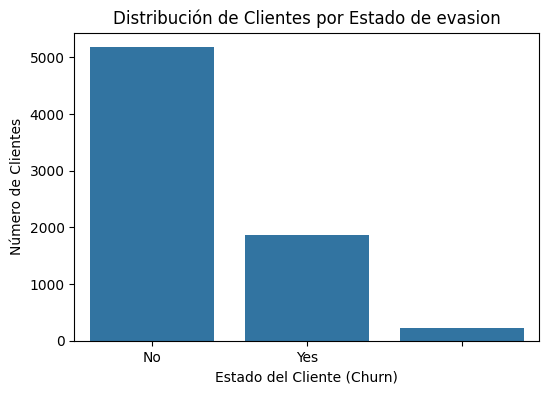

In [30]:

import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la distribución
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title('Distribución de Clientes por Estado de evasion')
plt.xlabel('Estado del Cliente (Churn)')
plt.ylabel('Número de Clientes')
plt.show()


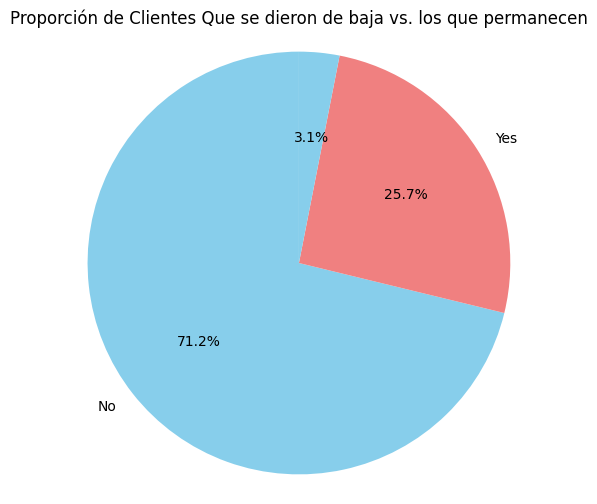

In [31]:
churn_counts = data['Churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proporción de Clientes Que se dieron de baja vs. los que permanecen')
plt.axis('equal')
plt.show()

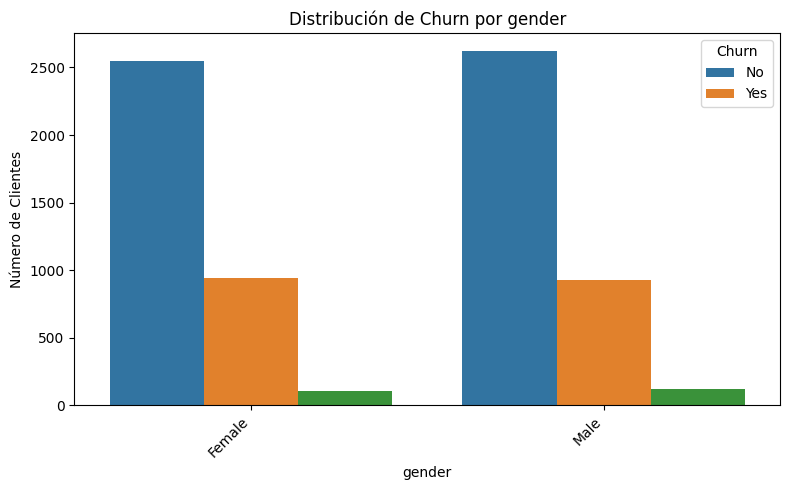

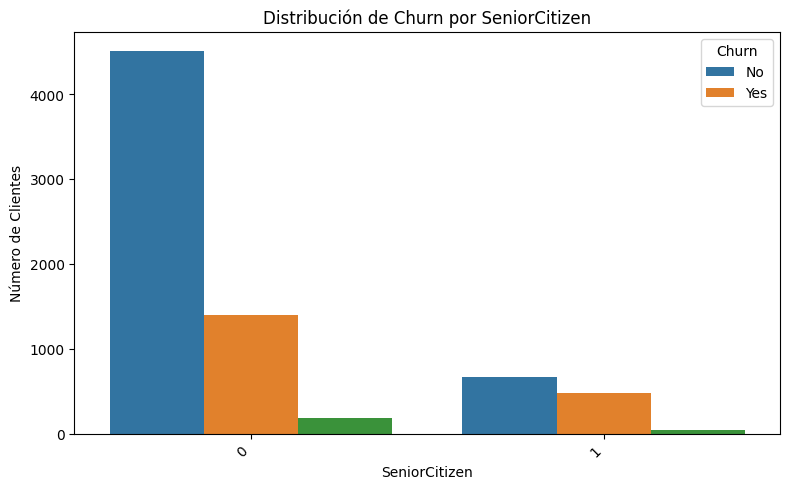

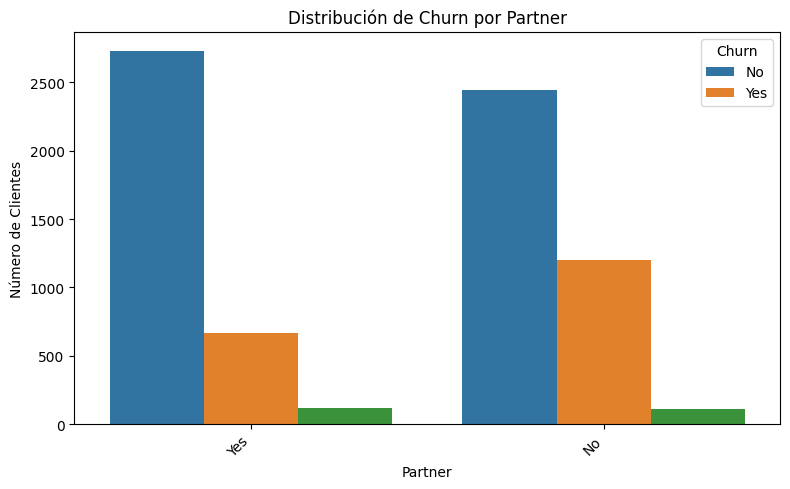

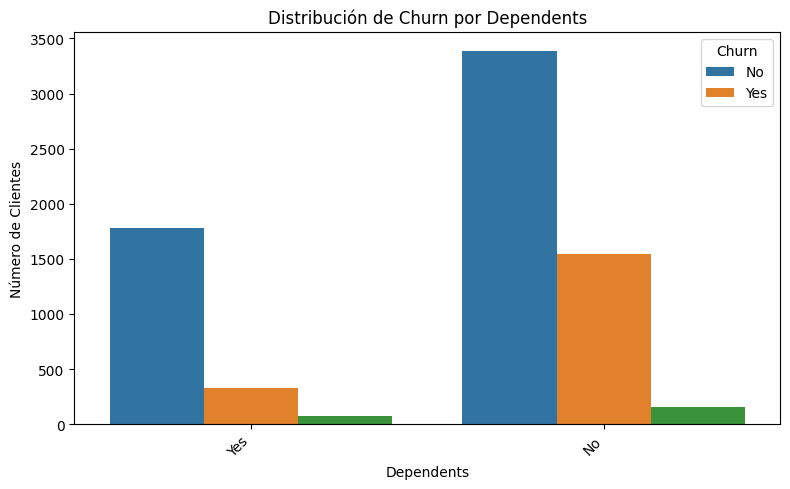

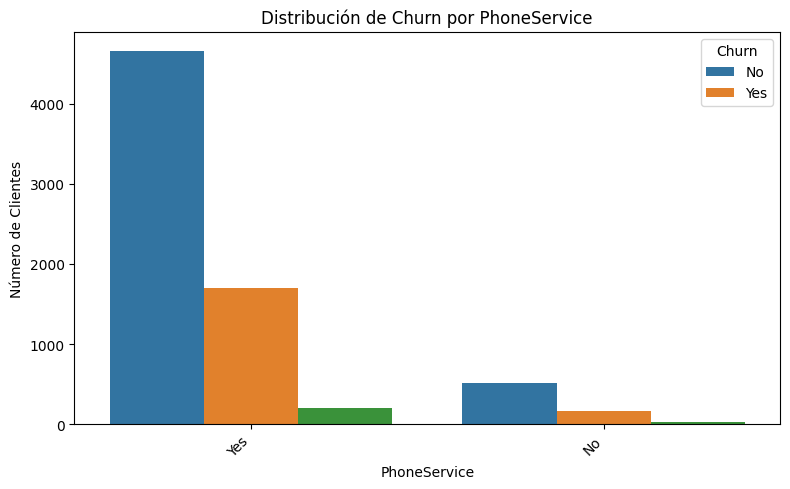

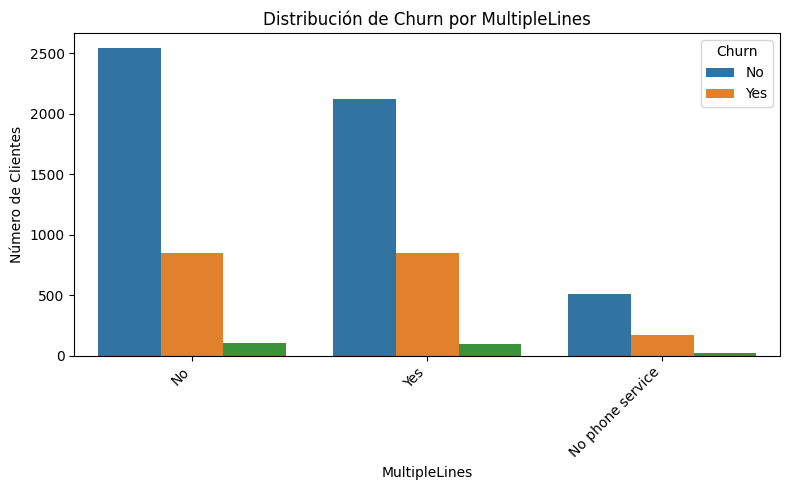

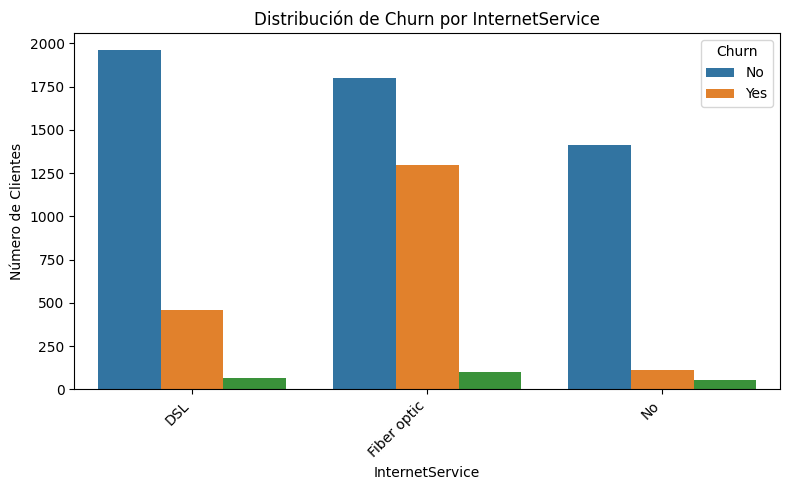

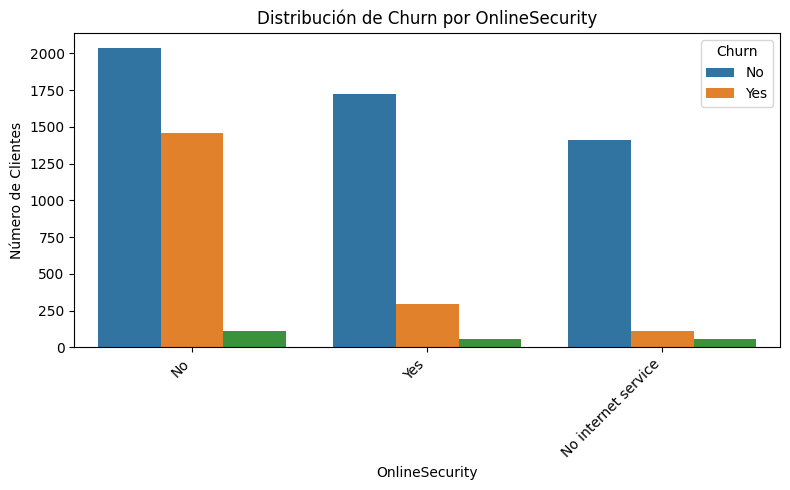

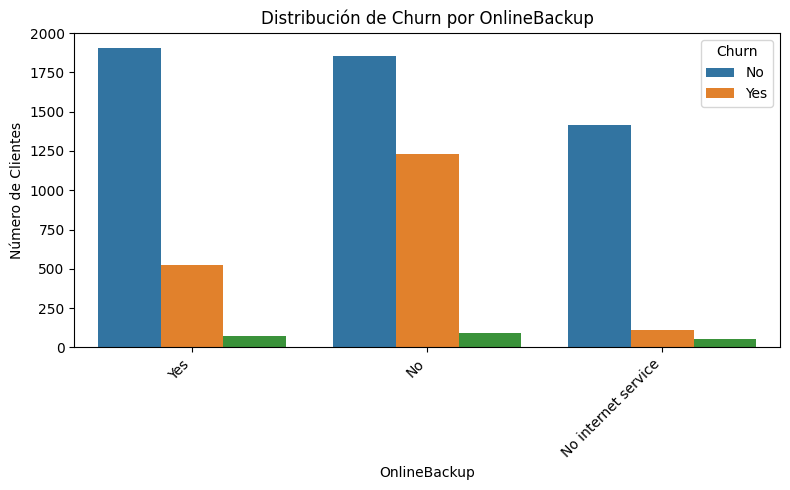

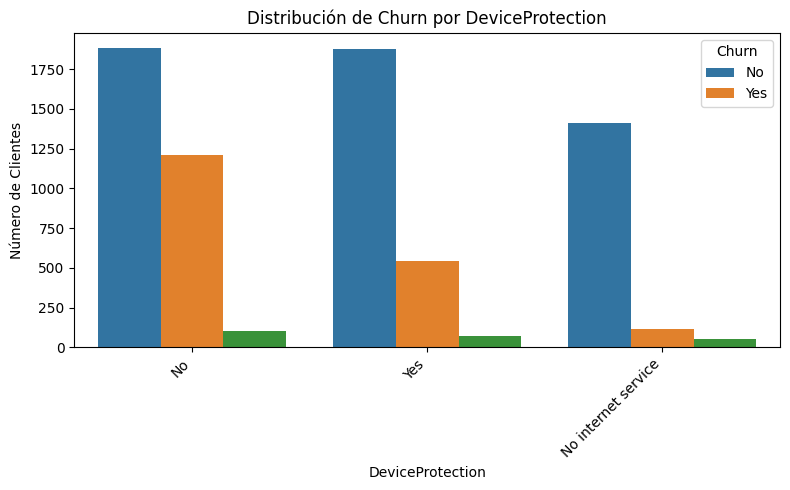

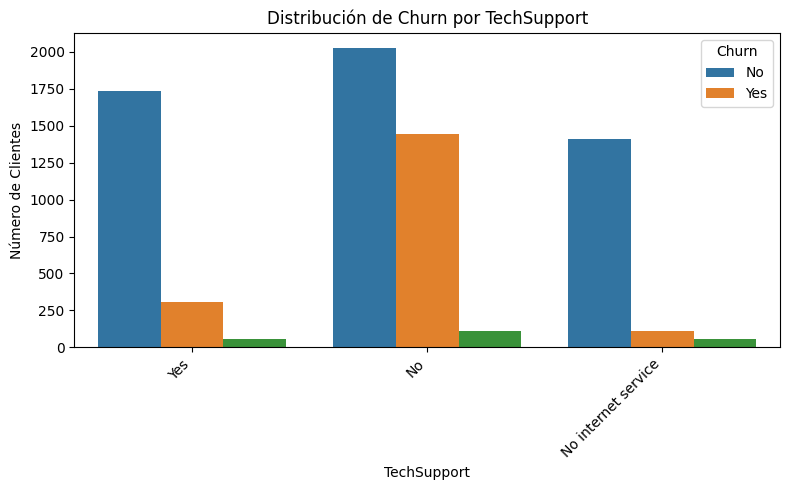

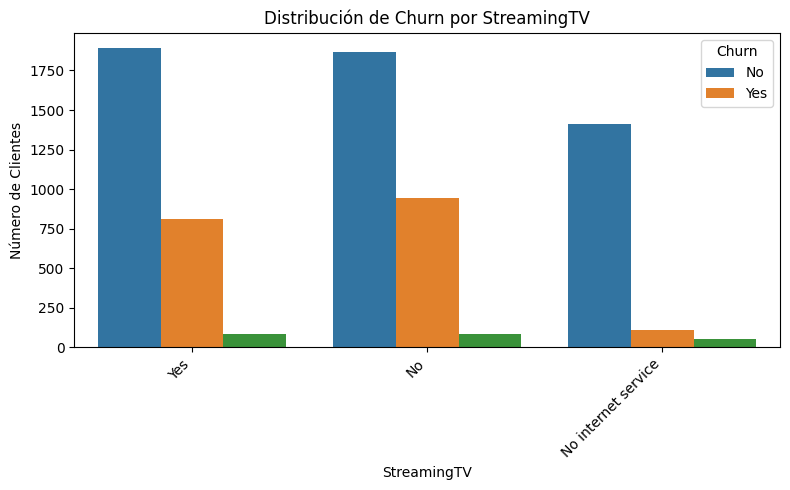

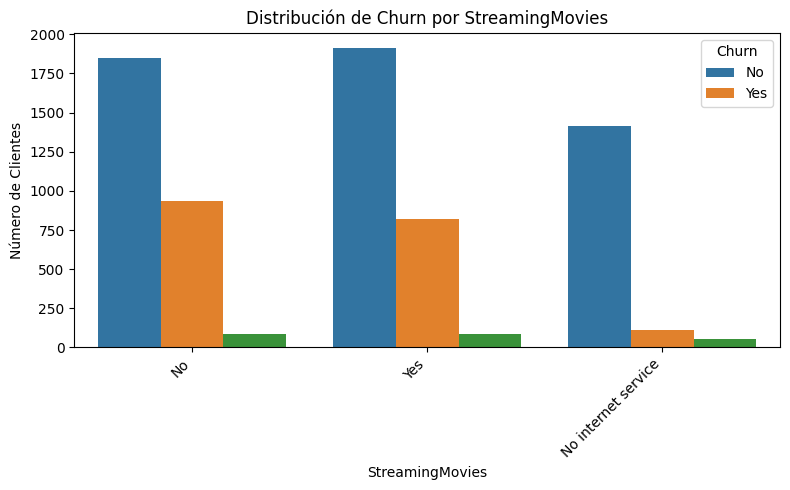

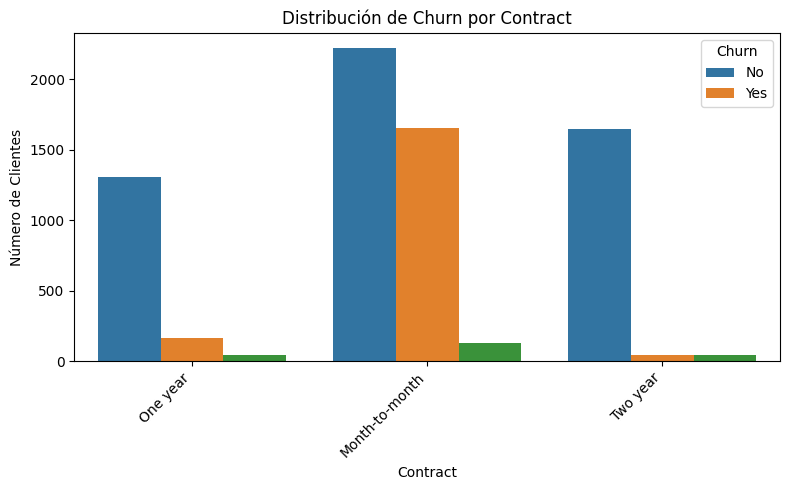

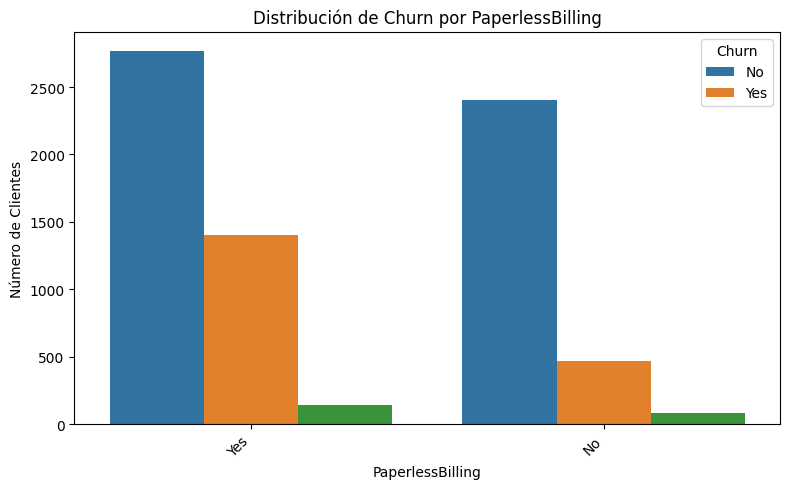

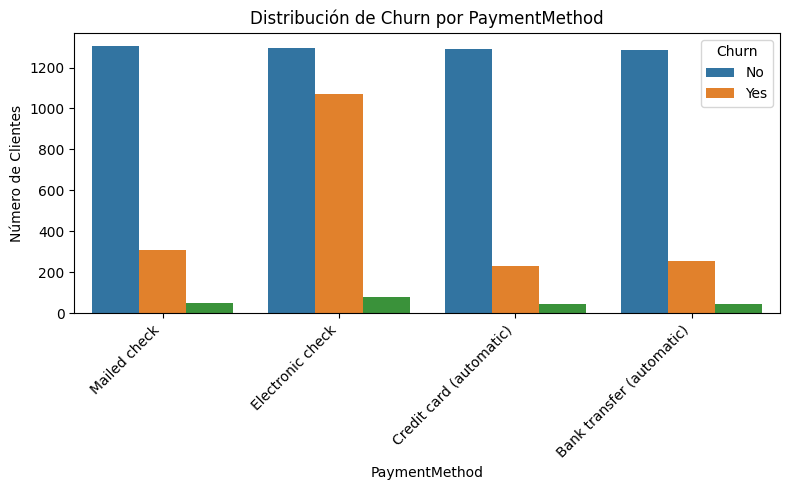

In [32]:

import matplotlib.pyplot as plt
# Análisis de Evasion por Variables Categóricas
categorical_cols = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Churn', data=data)
    plt.title(f'Distribución de Churn por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



In [33]:

# Análisis de Churn por Variables Numéricas
numerical_cols = ['tenure', 'Charges_Monthly', 'Charges_Total']




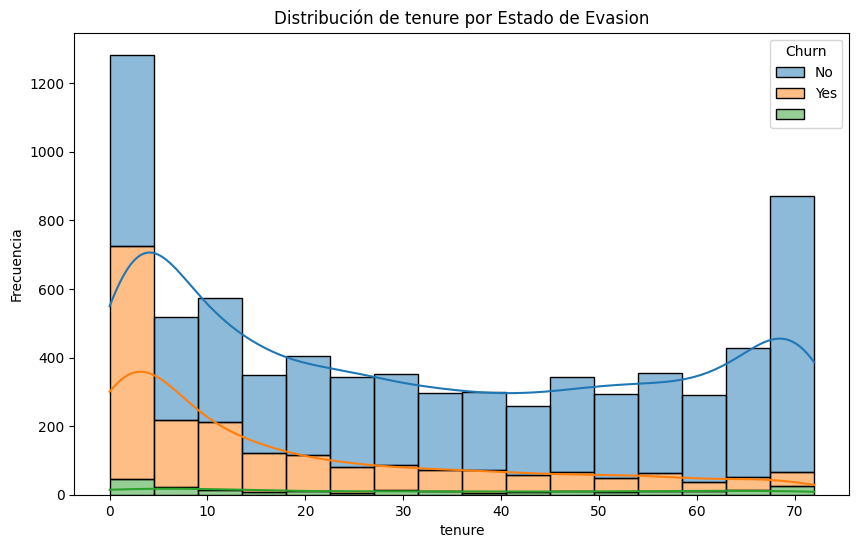

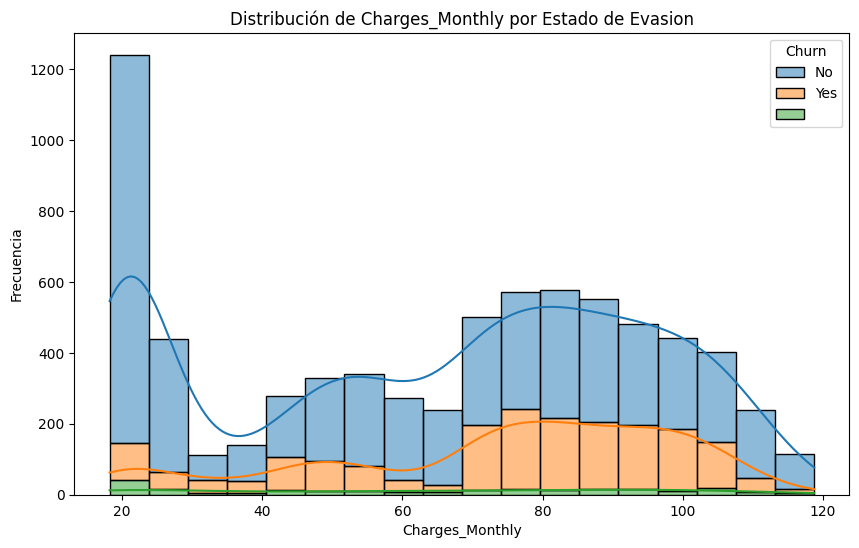

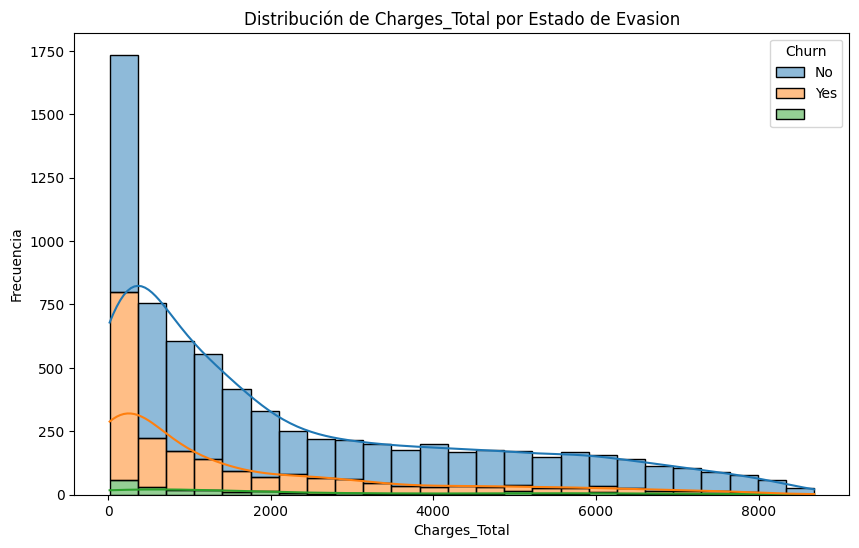

In [34]:
# Distribuciones de variables numéricas para clientes que cancelaron y no cancelaron
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=col, hue='Churn', multiple='stack', kde=True)
    plt.title(f'Distribución de {col} por Estado de Evasion')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

#📄Informe final


## Informe de Análisis de Evasión de Clientes (Churn)


###Introducción


El objetivo de este análisis es identificar los factores que influyen en la evasión de clientes  en una empresa de telecomunicaciones y utilizar estos insights para desarrollar estrategias que permitan retener a los clientes. La evasión de clientes es un desafío crítico para las empresas de telecomunicaciones, ya que impacta directamente en los ingresos y la rentabilidad. Comprender las razones detrás de la decisión de un cliente de abandonar la empresa es fundamental para implementar acciones preventivas efectivas.

###Limpieza y Tratamiento de Datos

El proceso de análisis comenzó con la importación del dataset `TelecomX_Data.json`. Los datos, inicialmente en formato JSON, fueron normalizados y cargados en un DataFrame de pandas para facilitar su manipulación.

Los pasos clave de limpieza y tratamiento de datos incluyeron:

1.  **Normalización de datos JSON:** La estructura anidada del archivo JSON fue aplanada utilizando `pd.json_normalize()` para obtener un formato tabular manejable.
2.  **Renombrado de columnas:** Se renombraron las columnas para que fueran más descriptivas y fáciles de trabajar.
3.  **Verificación y manejo de valores nulos:** Se identificaron los valores nulos en el dataset utilizando `data.isnull().sum()`. Se observó que la columna `Charges_Total` contenía valores nulos, los cuales se dejaron para su posterior tratamiento si fuera necesario en modelado (aunque en este análisis exploratorio no impactan significativamente).
4.  **Verificación de duplicados:** Se verificó la existencia de duplicados en la columna `customerID` para asegurar la unicidad de cada cliente. No se encontraron duplicados.
5.  **Conversión de tipos de datos:** Se identificó que la columna `Charges_Total` era de tipo 'object'. Se convirtió a tipo numérico utilizando `pd.to_numeric()`, manejando los errores con `errors='coerce'` para convertir valores problemáticos en `NaN`.
6.  **Creación de nuevas características (Feature Engineering):** Se creó una nueva columna `Cuentas_Diarias` calculando el costo diario promedio (`Charges_Monthly / 30`).

### 🔹 Análisis Exploratorio de Datos

Se realizó un análisis exploratorio exhaustivo para entender la estructura de los datos, identificar patrones y visualizar las relaciones entre las variables y el Churn.

*   **Distribución de Churn:** Se visualizó la proporción de clientes que se dieron de baja (Evasion) y los que permanecen utilizando un gráfico de barras y un gráfico de pastel. Se observó que aproximadamente el 26.5% de los clientes en el dataset han abandonado la empresa.
*   **Análisis de Churn por Variables Categóricas:** Se utilizaron gráficos de conteo (`sns.countplot`) para examinar cómo diferentes características categóricas (género, senior citizen, si tienen pareja o dependientes, servicios de teléfono e internet, tipo de contrato, facturación electrónica, método de pago) se relacionan con la tasa de Churn.
    *   **Internet Service:** Los clientes con servicios de internet `Fiber optic` muestran una tasa de Churn significativamente más alta en comparación con otros tipos de internet.
    *   **Contract:** Los clientes con contratos mes a mes (`Month-to-month`) tienen una probabilidad de Evasion mucho mayor que aquellos con contratos a largo plazo (`One year` o `Two year`).
    *   **Payment Method:** Algunos métodos de pago, como `Electronic check`, parecen estar asociados con una mayor tasa de evasión.
    *   **Online Security, Online Backup, Device Protection, Tech Support:** Los clientes que *no* tienen estos servicios de seguridad y soporte en línea tienden a tener una tasa de evasión más alta.
    *   **Senior Citizen:** Los ciudadanos mayores (`SeniorCitizen=Yes`) parecen tener una tasa de Evasión ligeramente superior.
    *   **Paperless Billing:** Los clientes con facturación electrónica (`PaperlessBilling=Yes`) muestran una mayor tasa de Evasión.
*   **Análisis de Churn por Variables Numéricas:** Se utilizaron histogramas (`sns.histplot`) para analizar la distribución de variables numéricas (`tenure`, `Charges_Monthly`, `Charges_Total`) para los grupos de clientes que cancelaron y los que no.
    *   **Tenure:** Los clientes con menor antigüedad (`tenure` bajo) tienen una probabilidad mucho mayor de darse de baja. La mayoría de los clientes que cancelan lo hacen en los primeros meses.
    *   **Charges Monthly:** Los clientes con cargos mensuales más altos, especialmente aquellos con servicios de fibra óptica, tienden a tener una mayor tasa de Evasion.
    *   **Charges Total:** De manera similar, los clientes con cargos totales acumulados más bajos (indicando menor antigüedad o menor consumo) tienen una mayor probabilidad de cancelar.

### 🔹 Conclusiones e Insights

Basado en el análisis exploratorio de datos, los principales insights identificados son:

*   **La antigüedad del cliente (tenure) es un predictor clave de Churn:** Los nuevos clientes son significativamente más propensos a irse.
*   **El tipo de contrato influye fuertemente:** Los contratos mes a mes son de alto riesgo.
*   **Los servicios de internet de fibra óptica y los altos cargos mensuales están asociados con un mayor Churn:** Esto podría indicar problemas con la calidad del servicio o el precio.
*   **La falta de servicios de valor agregado (seguridad, soporte, backup) aumenta el riesgo de Evasión:** Estos servicios parecen contribuir a la retención.
*   **Ciertos métodos de pago y la facturación electrónica están correlacionados con Evasión:** Aunque la causalidad requiere más investigación, son patrones a observar.

Estos hallazgos sugieren que la Evasion de clientes no es un fenómeno aleatorio, sino que está relacionado con la etapa del cliente en su ciclo de vida, el tipo de servicios que contratan, el precio y el nivel de soporte y seguridad que reciben.

### 🔹 Recomendaciones

Basado en los insights obtenidos, se proponen las siguientes recomendaciones estratégicas para reducir la evasión de clientes:

1.  **Focalizarse en la retención de nuevos clientes:** Implementar programas de onboarding robustos, ofrecer soporte proactivo y recopilar feedback temprano para abordar posibles problemas antes de que el cliente decida irse.
2.  **Promover contratos a largo plazo:** Ofrecer incentivos atractivos (descuentos, beneficios adicionales) para que los clientes opten por contratos anuales o bianuales, lo que reduce significativamente la probabilidad de Churn.
3.  **Investigar la experiencia de los clientes con fibra óptica:** Realizar un análisis más profundo sobre las posibles causas del alto Evasion en este segmento (problemas de red, expectativas no cumplidas, precios).
4.  **Incentivar la contratación de servicios de seguridad y soporte en línea:** Destacar el valor de estos servicios y posiblemente incluirlos en paquetes promocionales, especialmente para clientes de alto riesgo.
5.  **Analizar los métodos de pago asociados con alta evasión:** Investigar si hay problemas en el proceso de pago o en la comunicación asociada a ciertos métodos. Considerar alternativas o mejoras en la experiencia de pago.
6.  **Optimizar la experiencia de facturación electrónica:** Aunque es un servicio conveniente, su asociación con un mayor Evasion podría indicar problemas en la claridad de la factura o en el proceso de pago asociado.
7.  **Desarrollar modelos predictivos de Evasion:** Utilizar los datos y insights de este análisis para construir un modelo de machine learning que pueda identificar a los clientes en riesgo de Evasion de manera proactiva, permitiendo intervenciones personalizadas.
8.  **Ofrecer descuentos o beneficios personalizados:** Identificar a los clientes de alto riesgo y ofrecerles retenciones específicas basadas en sus patrones de uso y quejas (si están disponibles).

Implementar estas recomendaciones de manera estratégica, respaldada por un monitoreo continuo y análisis de datos, puede ayudar a la empresa a reducir la tasa de evasión de clientes y mejorar la lealtad a largo plazo.
